In [1]:
# import dependencies
import pandas as pd
import numpy as np
from numpy import array
from numpy import asarray
from numpy import zeros
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from zipfile import ZipFile
import json
import os.path
import re
import pickle

import data_download

# Add some convenience functions to Pandas DataFrame.
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.3f}'.format
def mask(df, key, function):
  """Returns a filtered dataframe, by applying function to key"""
  return df[function(df[key])]

def flatten_cols(df):
  df.columns = [' '.join(col).strip() for col in df.columns.values]
  return df

pd.DataFrame.mask = mask
pd.DataFrame.flatten_cols = flatten_cols

In [2]:
# movies, links, ratings, tags = data_download.load_unprocessed_df(use_large=False)
movies, links, ratings, tags, genome_tags, genome_scores = data_download.load_unprocessed_df(use_large=True)

MovieLens 25M Dataset is downloaded!
MovieLens Latest Small Dataset is downloaded!
MovieLens 25M Dataset is already extracted!
MovieLens Latest Small Dataset is already extracted!


# EDA

Let's look at the data

In [3]:
print("{} unique movies in movies.csv".format(len(movies.movieId.unique())))
print("{} unique movies in ratings.csv".format(len(ratings.movieId.unique())))
print("{} unique movies in tags.csv".format(len(tags.movieId.unique())))

62423 unique movies in movies.csv
59047 unique movies in ratings.csv
45251 unique movies in tags.csv


In [4]:
print("{} unique users in ratings.csv".format(len(ratings.userId.unique())))

162541 unique users in ratings.csv


In [5]:
movies.sample(10)

,movieId,title,genres
61444,205933,August in the Water (1995),Drama|Fantasy|Sci-Fi
54463,189627,Katie Says Goodbye (2018),(no genres listed)
19942,103474,How to Make Money Selling Drugs (2013),Documentary
52877,186273,The Guardian Angel (2018),Crime|Thriller
24193,120879,Soap and Water (1983),Comedy
25220,123252,I Accuse! (1958),Drama
43025,165121,Faintheart (2008),Comedy
8053,8767,"Big Clock, The (1948)",Crime|Film-Noir|Thriller
52014,184389,Under The Greenwood Tree (2005),Drama|Romance
2521,2612,Mildred Pierce (1945),Drama|Film-Noir


In [6]:
movies.shape

(62423, 3)

In [7]:
movies.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [8]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [9]:
links.sample(10)

,movieId,imdbId,tmdbId
27947,130556,72300,86574.000
37187,152087,1002563,318850.000
58964,199800,1298761,189349.000
58585,198921,8041922,559994.000
34269,145030,2006295,293646.000
26944,127843,85991,17895.000
7617,8069,77360,42201.000
27013,128097,3234126,216553.000
50783,181773,40303,55518.000
43608,166449,65798,106887.000


In [10]:
links.shape

(62423, 3)

In [11]:
links.dtypes

movieId      int64
imdbId       int64
tmdbId     float64
dtype: object

In [12]:
links.isna().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

In [13]:
ratings.sample(10)

,userId,movieId,rating,timestamp
19293534,125225,107406,4.000,1568952604
18159090,117600,6936,4.500,1504285309
2055435,13699,4308,4.000,1009091067
23091697,150005,27571,3.500,1384650163
15380662,99677,2916,3.500,1306939580
7106157,46082,1129,5.000,911238866
19148431,124233,138036,4.000,1450384701
19468592,126377,3243,3.000,1516228402
16617943,107787,103341,3.500,1445609475
10197903,66129,356,4.000,1111557259


In [14]:
ratings.shape

(25000095, 4)

In [15]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [16]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [17]:
tags.sample(10)

,userId,movieId,tag,timestamp
437736,43201,2571,superpowers,1553532093
299008,20075,1036,action,1371476015
774577,103712,6502,great soundtrack,1289275217
927727,133412,59369,father daughter relationship,1341779293
453413,45219,69481,thriller,1534547985
668215,83426,147346,serial killer,1551327394
486982,51750,47610,twist ending,1377053949
58459,6550,2710,true,1528612563
320460,21096,77181,politics,1311542577
223278,6729,122904,Marvel,1455506214


In [18]:
tags.shape

(1093360, 4)

In [19]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

In [20]:
tags.isna().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [21]:
genome_tags.sample(10)

,tagId,tag
141,142,blaxploitation
853,854,road movie
66,67,anti-hero
977,978,stupid
932,933,so bad it's funny
426,427,geek
1056,1057,unfunny
884,885,school
1086,1087,virtual reality
844,845,reflective


In [22]:
genome_tags.shape

(1128, 2)

In [23]:
genome_tags.dtypes

tagId     int64
tag      object
dtype: object

In [24]:
genome_tags.isna().sum()

tagId    0
tag      0
dtype: int64

In [25]:
genome_scores.sample(10)

,movieId,tagId,relevance
4226985,4177,370,0.051
11240537,71533,18,0.395
6247561,6255,698,0.005
1194213,1179,790,0.035
10065830,52838,687,0.029
11165841,70637,898,0.311
10151973,54171,1102,0.013
2496713,2475,450,0.038
12963901,104374,926,0.114
7367671,7618,704,0.076


In [26]:
genome_scores.shape

(15584448, 3)

In [27]:
genome_scores.dtypes

movieId        int64
tagId          int64
relevance    float64
dtype: object

In [28]:
genome_scores.isna().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

Do basic statistics on the dataset

In [29]:
n_users = ratings['userId'].nunique()
n_movies = ratings['movieId'].nunique()

In [30]:
print('number of users: {}\nnumber of movies: {}'.format(n_users, n_movies))

number of users: 162541
number of movies: 59047


In [31]:
movie_summary = pd.DataFrame(ratings.groupby('movieId')['rating'].mean())

In [32]:
movie_summary['ratings_count'] = ratings.groupby('movieId')['rating'].count()

In [33]:
movie_summary.head()

,rating,ratings_count
movieId,,
1,3.894,57309
2,3.252,24228
3,3.142,11804
4,2.854,2523
5,3.058,11714


In [34]:
movie_summary['ratings_count'].describe()

count   59047.000
mean      423.393
std      2477.886
min         1.000
25%         2.000
50%         6.000
75%        36.000
max     81491.000
Name: ratings_count, dtype: float64

In [36]:
movies = pd.merge(movies, movie_summary, left_on="movieId", right_index=True)

In [37]:
movies.head()

,movieId,title,genres,rating,ratings_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.894,57309
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.252,24228
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142,11804
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.854,2523
4,5,Father of the Bride Part II (1995),Comedy,3.058,11714


In [46]:
movies[movies['ratings_count'] > 100].sort_values("rating", ascending=False)

,movieId,title,genres,rating,ratings_count
45741,171011,Planet Earth II (2016),Documentary,4.483,1124
40597,159817,Planet Earth (2006),Documentary,4.465,1747
314,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.414,81482
45593,170705,Band of Brothers (2001),Action|Drama|War,4.399,1356
45973,171495,Cosmos,(no genres listed),4.327,277
...,...,...,...,...,...
12618,61348,Disaster Movie (2008),Comedy,1.206,557
1740,1826,Barney's Great Adventure (1998),Adventure|Children,1.195,397
4669,4775,Glitter (2001),Drama|Musical|Romance,1.126,669
6360,6483,From Justin to Kelly (2003),Musical|Romance,1.028,417


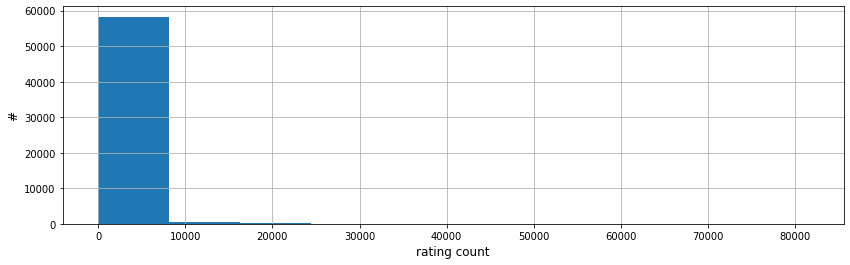

In [35]:
plt.figure(figsize=(14,4))
plt.xlabel('rating count', fontsize=12)
plt.ylabel('#', fontsize=12)
movie_summary['ratings_count'].hist()

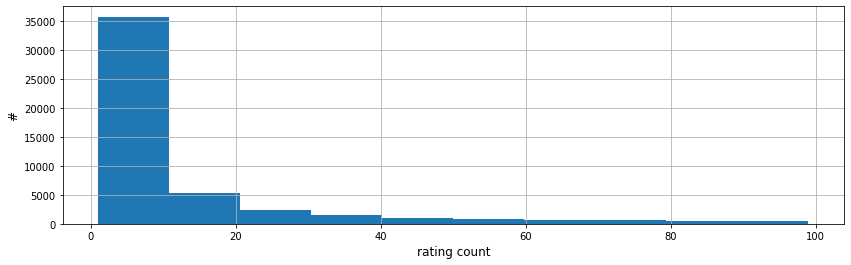

In [36]:
plt.figure(figsize=(14,4))
plt.xlabel('rating count', fontsize=12)
plt.ylabel('#', fontsize=12)
movie_summary[movie_summary['ratings_count'] < 100]['ratings_count'].hist()

In [37]:
print("Movies with less than 100 ratings:")
print((movie_summary['ratings_count'] < 100).sum())

Movies with less than 100 ratings:
48721


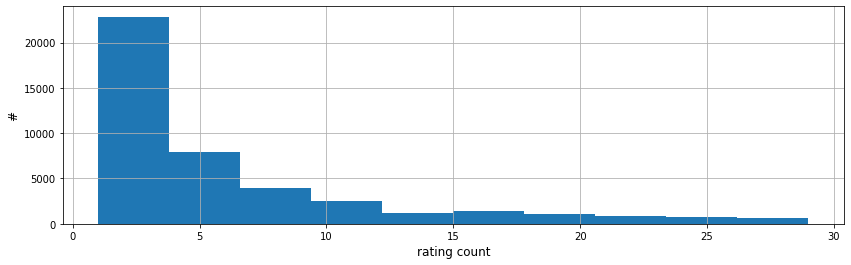

In [38]:
plt.figure(figsize=(14,4))
plt.xlabel('rating count', fontsize=12)
plt.ylabel('#', fontsize=12)
movie_summary[movie_summary['ratings_count'] < 30]['ratings_count'].hist()

In [39]:
print('num movies with 0 ratings = {}'.format((movie_summary['ratings_count'] == 0).sum()))
print('num movies with 1 rating  = {}'.format((movie_summary['ratings_count'] == 1).sum()))
print('num movies with < 10 rating  = {}'.format((movie_summary['ratings_count'] < 10).sum()))
print('num movies with < 20 rating  = {}'.format((movie_summary['ratings_count'] < 20).sum()))
print('num movies with < 30 rating  = {}'.format((movie_summary['ratings_count'] < 30).sum()))
print('num movies with < 50 rating  = {}'.format((movie_summary['ratings_count'] < 50).sum()))

num movies with 0 ratings = 0
num movies with 1 rating  = 10298
num movies with < 10 rating  = 34717
num movies with < 20 rating  = 40617
num movies with < 30 rating  = 43132
num movies with < 50 rating  = 45871


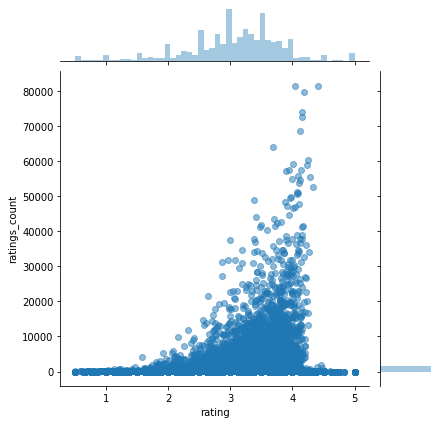

In [40]:
sns.jointplot(x='rating', y='ratings_count', data=movie_summary, alpha=0.5, height=6)

In [41]:
users_ratings = (
    ratings
    .groupby('userId', as_index=False)
    .agg({'rating': ['count', 'mean']})
    .flatten_cols()
)

In [42]:
users_ratings.head()

,userId,rating count,rating mean
0,1,70,3.814
1,2,184,3.630
2,3,656,3.697
3,4,242,3.378
4,5,101,3.752


In [43]:
users_ratings.describe()

,userId,rating count,rating mean
count,162541.000,162541.000,162541.000
mean,81271.000,153.808,3.679
std,46921.689,268.048,0.477
min,1.000,20.000,0.500
25%,40636.000,36.000,3.399
50%,81271.000,71.000,3.700
75%,121906.000,162.000,4.000
max,162541.000,32202.000,5.000


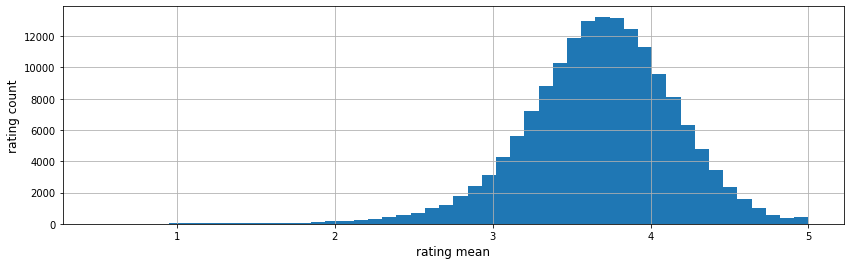

In [44]:
plt.figure(figsize=(14,4))
plt.xlabel('rating mean', fontsize=12)
plt.ylabel('rating count', fontsize=12)
users_ratings['rating mean'].hist(bins=50)

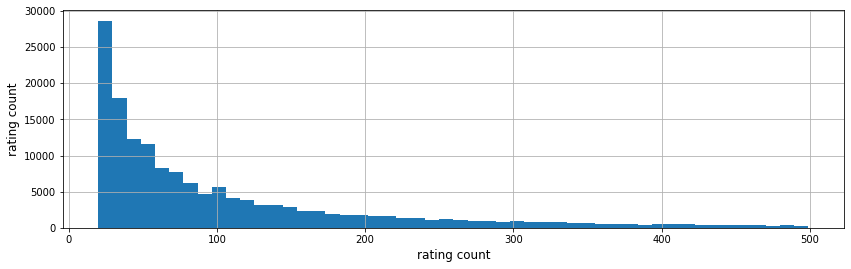

In [45]:
plt.figure(figsize=(14,4))
plt.xlabel('rating count', fontsize=12)
plt.ylabel('rating count', fontsize=12)
users_ratings[users_ratings['rating count'] < 500]['rating count'].hist(bins=50)

# Cleaning

In [46]:
# handle genres (remove all non alphabet characters)
movies['genres'] = movies['genres'].str.replace(pat="|", repl=" ")
movies['genres'] = movies['genres'].str.replace(pat="-", repl="")
movies['genres'] = movies['genres'].str.replace(pat="(no genres listed)", repl="")
movies['genres'] = movies['genres'].str.replace(pat="(", repl="")
movies['genres'] = movies['genres'].str.replace(pat=")", repl="")
movies.sample(5)

,movieId,title,genres
43480,166155,Godless (2016),Drama
49702,179433,"Our Friend, Martin (1999)",Animation Children
34011,144474,Control (2013),Thriller
8011,8725,"Goodbye, Columbus (1969)",Comedy Drama Romance
10685,44225,Aquamarine (2006),Children Comedy Fantasy


In [47]:
# drop timestamps, not needed
ratings = ratings.drop("timestamp", axis=1)
tags = tags.drop("timestamp", axis=1)

In [48]:
# fill some nans 
tags.fillna("", inplace=True)

In [49]:
print("{} unique movies in movies.csv".format(len(movies.movieId.unique())))
print("{} unique movies in ratings.csv".format(len(ratings.movieId.unique())))
print("{} unique movies in tags.csv".format(len(tags.movieId.unique())))

62423 unique movies in movies.csv
59047 unique movies in ratings.csv
45251 unique movies in tags.csv


In [50]:
# drop movies with to little reviews
movie_ids_to_remove = movie_summary.loc[movie_summary['ratings_count'] < 10].index
ratings = ratings[~ratings["movieId"].isin(movie_ids_to_remove)]
tags = tags[~tags["movieId"].isin(movie_ids_to_remove)]
movies = movies[~movies["movieId"].isin(movie_ids_to_remove)]
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [51]:
print("{} unique movies in movies.csv".format(len(movies.movieId.unique())))
print("{} unique movies in ratings.csv".format(len(ratings.movieId.unique())))
print("{} unique movies in tags.csv".format(len(tags.movieId.unique())))

27706 unique movies in movies.csv
24330 unique movies in ratings.csv
26178 unique movies in tags.csv


In [52]:
# we should remove movies from 1990 and backwards
import re

def get_release_year(row):
    title = row["title"]
    year = re.search(r'\(\d{4}\)', title)
    if year:
        year = year.group(0)
    else:
        return None
    year = int(year.replace('(', '').replace(')', ''))
    return year

release_year = movies.apply(get_release_year, axis=1)
reverse_year_mask = release_year <= 1990
year_mask = release_year >= 1990

In [56]:
ratings = ratings[~ratings["movieId"].isin(reverse_year_mask)]
tags = tags[~tags["movieId"].isin(reverse_year_mask)]
movies = movies[year_mask]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
print("{} unique movies in movies.csv".format(len(movies.movieId.unique())))
print("{} unique movies in ratings.csv".format(len(ratings.movieId.unique())))
print("{} unique movies in tags.csv".format(len(tags.movieId.unique())))

18033 unique movies in movies.csv
24329 unique movies in ratings.csv
26177 unique movies in tags.csv


In [ ]:
%%time
# group tags into a single column by movie
tags = pd.DataFrame(tags.groupby('movieId')['tag'].apply(lambda x: "{%s}" % ' '.join(x)))
tags.reset_index(inplace=True)
tags.head()

In [ ]:
# ratings need to be a float32 to save memory
ratings["rating"] = ratings["rating"].values.astype(np.float32)

In [ ]:
# map unique movies to a dict of 0-based indicies 
# dict: {movieId: idx}, e.g., {296: 0}
unique_movies = ratings.movieId.unique()
movie2idx = {o: i for i, o in enumerate(unique_movies)}

In [ ]:
# for content based filtering, we need to work with tags and genres
# for this, we need to a ratings DF without duplicates to create the correct idx mappings 
ratings_unique = ratings.drop_duplicates('movieId').copy()
ratings_unique.head()

In [ ]:
# merge tags with ratings, and apply idx mapping (right join for keping ratings keys ordered)
tags = pd.merge(tags, ratings_unique, on="movieId", how="right")
tags["movieId"] = tags["movieId"].apply(lambda x: movie2idx[x])
tags.head()

In [ ]:
%%time
# merge movies with ratings and map idx
movies = pd.merge(movies, ratings_unique, on="movieId", how="inner")
movies["movieId"] = movies["movieId"].apply(lambda x: movie2idx[x])
movies.head()

In [ ]:
# merge tags and genres into one description column
tags = pd.merge(movies, tags, left_index=True, right_on='movieId', how='right')
tags['desc'] = tags[['tag', 'genres']].apply(lambda x: ' '.join(x), axis=1)

In [ ]:
tags.head()